### Imports

In [2]:
!pip install mne

### Loading edf

In [50]:
file = "..\dataverse_files\h01.edf"
edfs_path = "..\dataverse_files"
manifest_path = "..\dataverse_files\MANIFEST.txt"

In [53]:
import os
import mne

def load_edfs(edfs_path):
    raw_edfs = []
    
    edfs_file_names = [f for f in os.listdir(edfs_path) if f.endswith('.edf')]
    
    for file_name in edfs_file_names:
        path = edfs_path + '\\' + file_name 
        data = mne.io.read_raw_edf(path, preload=True, verbose=False)
        raw_edfs.append(data)

    return raw_edfs

In [54]:
raw_edfs = load_edfs(edfs_path)

In [55]:
len(raw_edfs)

28

### Preprocessing

Effective window size : 8.192 (s)


<ipython-input-56-c4ef28341454>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_patient0.plot_psd(area_mode='range', tmax=10.0, average=False);


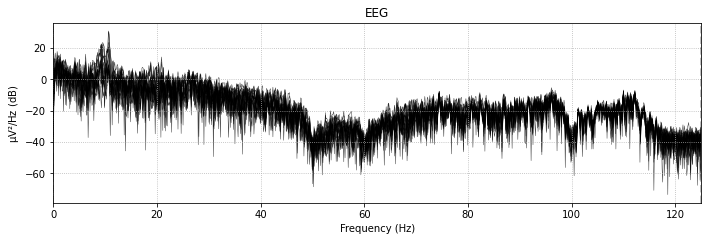

In [56]:
raw_patient0 = raw_edfs[0]

# selection = mne.read_vectorview_selection('Left-temporal')
# picks = mne.pick_types(raw_patient0.info, meg='mag', eeg=False, eog=False,
#                        stim=False, exclude='bads', selection=selection)

raw_patient0.plot_psd(area_mode='range', tmax=10.0, average=False);

### Filtration

Opening raw-browser...


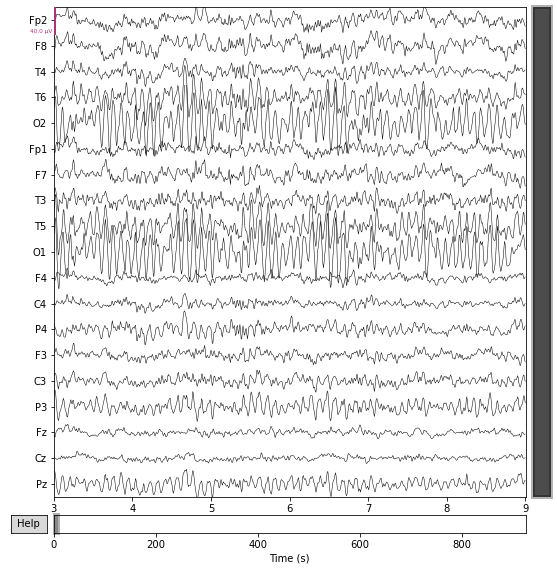

ValueError: No stim channel found to extract event triggers.

In [127]:
raw_patient0.copy().pick_types(eeg=True).plot(start=3, duration=6)
events = mne.find_events(raw_patient0, stim_channel='STI 014')

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 83 samples (0.332 sec)

Effective window size : 8.192 (s)


<ipython-input-57-6f42d4479cfe>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_patient0.plot_psd(area_mode='range', average=False);


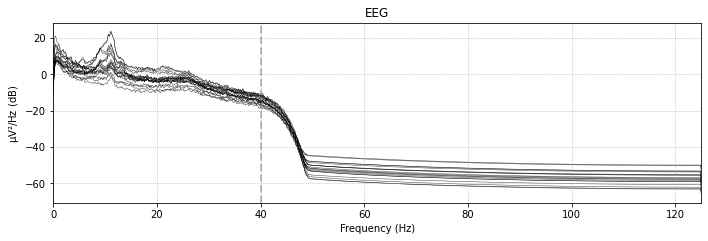

In [57]:
# low pass
raw_patient0.filter(None, 40., fir_design='firwin')
raw_patient0.plot_psd(area_mode='range', average=False);

### Segmentation

In [82]:
!pip install mne-connectivity

In [86]:
epochs = mne.make_fixed_length_epochs(raw_patient0, duration=25, preload=True)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped


In [118]:
epochs.to_data_frame()

,time,condition,epoch,Fp2,F8,T4,T6,O2,Fp1,F7,...,O1,F4,C4,P4,F3,C3,P3,Fz,Cz,Pz
0,0,1,0,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
1,40,1,0,-0.276075,-0.035258,0.286269,-0.484703,-0.392096,0.328524,0.099670,...,-0.306090,0.497107,0.299564,0.211387,0.127203,-0.042823,0.023543,0.258502,0.614536,0.493888
2,80,1,0,-14.001963,-3.869122,2.439270,12.897212,5.693192,-2.704164,4.226448,...,2.066388,0.471492,0.919312,8.316501,1.639622,2.427715,-0.137914,0.706264,1.543643,-2.023704
3,120,1,0,-11.098946,-12.823911,-9.500436,-17.353689,-4.566324,1.917124,1.520006,...,-8.473508,-3.237428,-7.254088,-7.667931,1.877855,2.432820,0.196813,0.281702,7.716606,2.102042
4,160,1,0,-5.836545,-0.662766,-0.336271,-6.500462,-12.791090,7.917716,11.299310,...,0.103311,-0.493746,-3.362657,-8.371267,9.114664,5.845951,-2.435332,4.258040,4.403084,-1.596596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23120,24800,1,36,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
23121,24840,1,36,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
23122,24880,1,36,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
23123,24920,1,36,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500


Using matplotlib as 2D backend.
Opening epochs-browser...


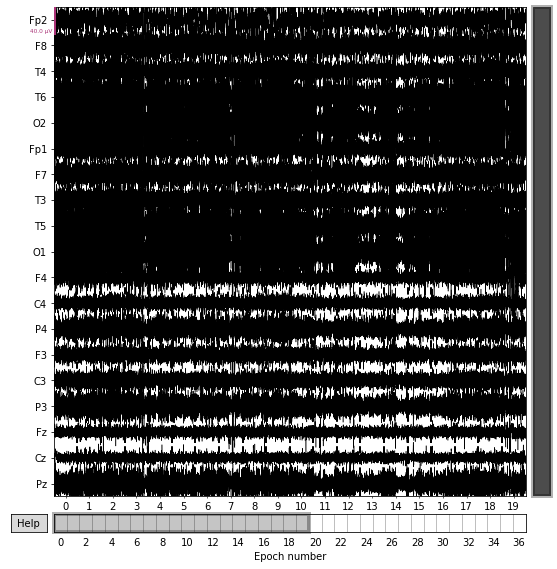

In [114]:
epochs.plot(block=True);

In [87]:
len(epochs)

37

In [105]:
type(epochs.get_data())

numpy.ndarray

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-96-f40ce4f3c9d7>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  event_related_plot = epochs.plot_image(picks=['F8'])


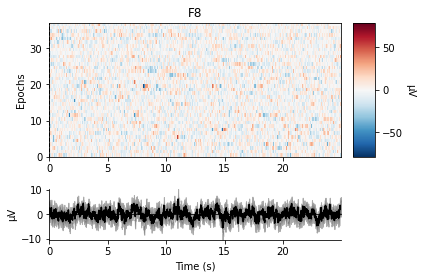

In [96]:
event_related_plot = epochs.plot_image(picks=['F8'])

In [99]:
epochs.get_data()[:1]

array([[[ 2.50000000e-09, -1.31653107e-08,  1.93409788e-07, ...,
         -5.83610283e-06, -6.16348875e-06, -7.24177302e-06],
        [ 2.50000000e-09, -5.11675054e-08,  1.71580963e-07, ...,
         -7.94684012e-06, -8.38121580e-06, -9.43480190e-06],
        [ 2.50000000e-09, -1.41552690e-07,  5.04017420e-08, ...,
         -4.72941579e-06, -3.83743578e-06, -3.62990576e-06],
        ...,
        [ 2.50000000e-09, -4.28858064e-08, -4.25754630e-08, ...,
         -6.53819648e-08, -3.56351751e-07, -8.44396514e-07],
        [ 2.50000000e-09, -5.00140997e-08, -5.89424612e-08, ...,
          6.14911357e-06,  4.69183008e-06,  3.37693391e-06],
        [ 2.50000000e-09, -8.27171964e-08, -1.56065104e-07, ...,
          1.56052697e-05,  1.11485061e-05,  6.66492097e-06]]])

In [101]:
from mne_connectivity import envelope_correlation
corr_matrix = envelope_correlation(epochs).get_data()
print(corr_matrix.shape)

Adding metadata with 3 columns
(37, 19, 19, 1)


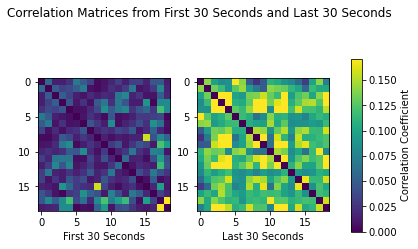

In [103]:
import numpy as np
first_30 = corr_matrix[0]
last_30 = corr_matrix[-1]
corr_matrices = [first_30, last_30]
color_lims = np.percentile(np.array(corr_matrices), [5, 95])
titles = ['First 30 Seconds', 'Last 30 Seconds']

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Correlation Matrices from First 30 Seconds and Last 30 Seconds')
for ci, corr_matrix in enumerate(corr_matrices):
    ax = axes[ci]
    mpbl = ax.imshow(corr_matrix, clim=color_lims)
    ax.set_xlabel(titles[ci])
fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.85, 0.2, 0.025, 0.6])
cbar = fig.colorbar(ax.images[0], cax=cax)
cbar.set_label('Correlation Coefficient')

In [112]:
print(epochs.get_data().ndim)

3


In [120]:
epochs_data = np.empty((19, 1, 1))
patiens_epochs = []
for edf in raw_edfs:
    epochs  = mne.make_fixed_length_epochs(raw_patient0, duration=25, preload=True, verbose=False)
#     np.concatenate((epochs_data, epochs.get_data()))
    patiens_epochs.append(epochs)

In [121]:
len(patiens_epochs)

28

### Feature extraction

### Classification

array([1, 2, 3, 1, 2, 3])